In [67]:
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data3 = train = np.loadtxt('data/data_3class.csv')
print data3.shape

(800, 3)


In [80]:
ntrain = 400
ntest = 200
nval = 200

X_train = data3[0:ntrain,0:2]
y_train = np.squeeze(data3[0:ntrain,2:3].astype(int))
X_val = data3[ntrain:ntrain+nval,0:2]
y_val = np.squeeze(data3[ntrain:ntrain+nval,2:3].astype(int))
X_test = data3[ntrain+nval:ntrain+nval+ntest,0:2]
y_test = np.squeeze(data3[ntrain+nval:ntrain+nval+ntest,2:3].astype(int))
data = {
      'X_train': X_train, 'y_train': y_train,
      'X_val': X_val, 'y_val': y_val,
      'X_test': X_test, 'y_test': y_test,
    }

In [71]:
# datatest = get_CIFAR10_data()
# for k, v in datatest.iteritems():
#   print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [73]:
# print type(datatest['y_val'][0])
# print type(data['y_val'][0])
# print data['y_val']
# np.squeeze(data3[300:400,2:3].astype(int))
# data3[300:400,0:2]

In [146]:
model = TwoLayerNet()
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
############################################################################## 
#model = TwoLayerNet(hidden_dim = 200,reg = 0.5)
model = TwoLayerNet(input_dim=2, hidden_dim=100, num_classes=3, weight_scale=1.0, reg =0.00)
solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                    'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=100, batch_size=100,
                print_every=100)
solver.train()

(Iteration 1 / 400) loss: 11.080342
(Epoch 0 / 100) train acc: 0.412500; val_acc: 0.425000
(Epoch 1 / 100) train acc: 0.420000; val_acc: 0.425000
(Epoch 2 / 100) train acc: 0.425000; val_acc: 0.440000
(Epoch 3 / 100) train acc: 0.432500; val_acc: 0.445000
(Epoch 4 / 100) train acc: 0.437500; val_acc: 0.460000
(Epoch 5 / 100) train acc: 0.440000; val_acc: 0.470000
(Epoch 6 / 100) train acc: 0.467500; val_acc: 0.470000
(Epoch 7 / 100) train acc: 0.500000; val_acc: 0.500000
(Epoch 8 / 100) train acc: 0.535000; val_acc: 0.540000
(Epoch 9 / 100) train acc: 0.542500; val_acc: 0.555000
(Epoch 10 / 100) train acc: 0.550000; val_acc: 0.565000
(Epoch 11 / 100) train acc: 0.560000; val_acc: 0.570000
(Epoch 12 / 100) train acc: 0.567500; val_acc: 0.590000
(Epoch 13 / 100) train acc: 0.572500; val_acc: 0.595000
(Epoch 14 / 100) train acc: 0.577500; val_acc: 0.605000
(Epoch 15 / 100) train acc: 0.585000; val_acc: 0.600000
(Epoch 16 / 100) train acc: 0.590000; val_acc: 0.610000
(Epoch 17 / 100) train

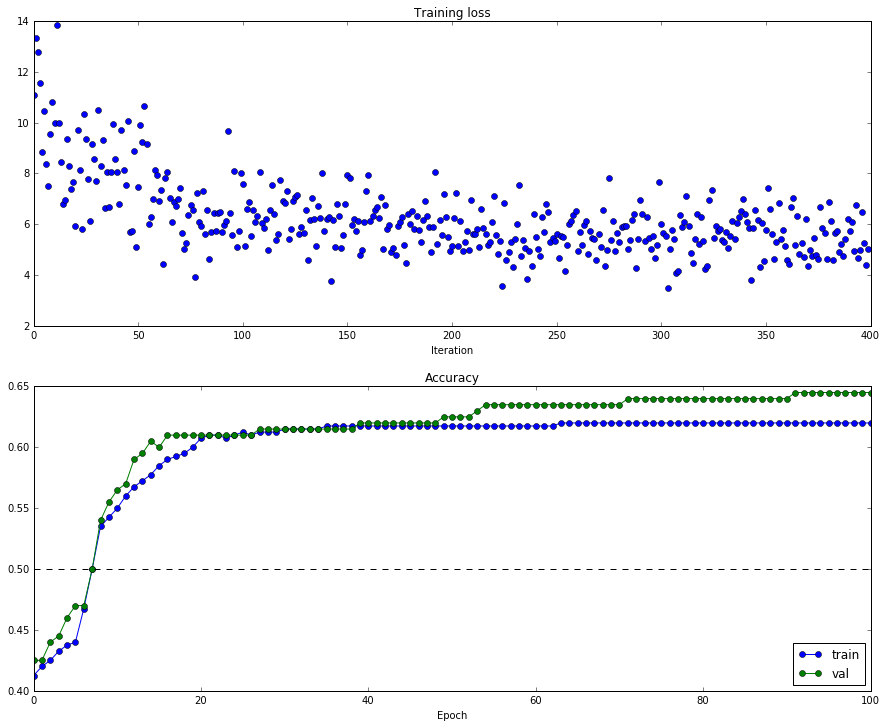

In [147]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [8]:
dsolver.train_acc_history

[0.48499999999999999, 0.42499999999999999]

(Iteration 1 / 80) loss: 2.793771
(Epoch 0 / 20) train acc: 0.255000; val_acc: 0.250000
(Epoch 1 / 20) train acc: 0.255000; val_acc: 0.255000
(Epoch 2 / 20) train acc: 0.400000; val_acc: 0.405000
(Epoch 3 / 20) train acc: 0.495000; val_acc: 0.475000
(Epoch 4 / 20) train acc: 0.540000; val_acc: 0.485000
(Epoch 5 / 20) train acc: 0.555000; val_acc: 0.505000
(Epoch 6 / 20) train acc: 0.585000; val_acc: 0.530000
(Epoch 7 / 20) train acc: 0.750000; val_acc: 0.705000
(Epoch 8 / 20) train acc: 0.865000; val_acc: 0.855000
(Epoch 9 / 20) train acc: 0.865000; val_acc: 0.855000
(Epoch 10 / 20) train acc: 0.865000; val_acc: 0.855000
(Epoch 11 / 20) train acc: 0.870000; val_acc: 0.865000
(Epoch 12 / 20) train acc: 0.870000; val_acc: 0.865000
(Epoch 13 / 20) train acc: 0.880000; val_acc: 0.860000
(Epoch 14 / 20) train acc: 0.880000; val_acc: 0.865000
(Epoch 15 / 20) train acc: 0.880000; val_acc: 0.865000
(Epoch 16 / 20) train acc: 0.880000; val_acc: 0.875000
(Epoch 17 / 20) train acc: 0.890000; val_

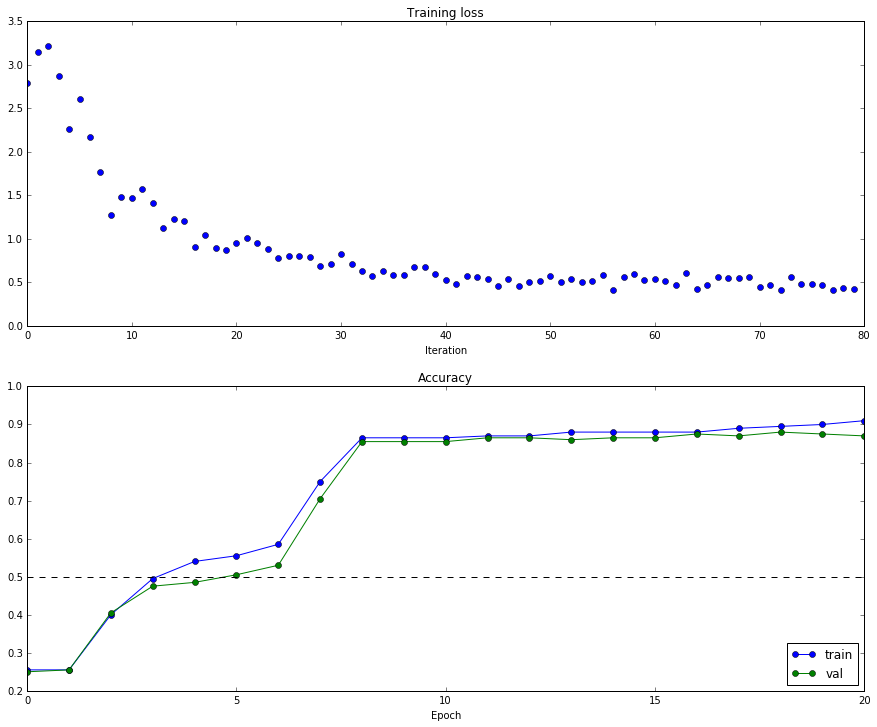

In [170]:
num_train = 200
#weight_scale = 1/np.sqrt(50)
weight_scale = 0.8
learning_rate = 1e-2


small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = FullyConnectedNet([10,10], input_dim=2, num_classes=3,
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=80, num_epochs=20, batch_size=50,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [106]:
loss, grads = model.loss(data['X_train'], data['y_train'])
print 'Initial loss: ', loss

for name in sorted(grads):
    f = lambda _: model.loss(data['X_train'],  data['y_train'])[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
    print '%s relative error: %.2e' % (name, rel_error(grad_num, grads[name]))
    print grads[name]

Initial loss:  0.887459059505
W1 relative error: 6.75e-10
[[-0.08068174  0.01212104 -0.14071152 -0.02053686 -0.08271856]
 [ 0.03087349 -0.00919665  0.3051297  -0.07074648  0.17459088]]
W2 relative error: 7.73e-09
[[ -4.17792447e-02   5.21403074e-02  -2.89457679e-02   7.62773558e-04
    0.00000000e+00]
 [  3.21919905e-02  -2.45259479e-02  -3.24266157e-02   0.00000000e+00
    1.81131314e-02]
 [ -1.97849390e-02   1.55813404e-03   5.91071256e-03   7.43182162e-03
    3.11549476e-04]
 [  3.53601529e-02   1.11741095e-02  -1.48257859e-01   0.00000000e+00
   -6.05367913e-05]
 [ -6.48705613e-04  -1.87895770e-02   9.48770799e-03   7.49172442e-03
    6.40215367e-04]]
W3 relative error: 1.42e-07
[[  1.53722333e-01  -7.79729620e-02  -7.57493711e-02]
 [ -5.45216435e-02   1.38719585e-01  -8.41979414e-02]
 [  1.01925597e-01  -4.32202067e-02  -5.87053900e-02]
 [ -3.85935734e-04   3.54137923e-04   3.17978109e-05]
 [  3.95759360e-03  -6.30448835e-03   2.34689476e-03]]
b1 relative error: 1.21e-10
[ 0.03999